In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import Aq_Optimization_functons
from Aq_Optimization_functons import *
import warnings
warnings.filterwarnings("ignore")
import time
%load_ext autoreload
%autoreload 2

/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
plt.rcParams["figure.dpi"] = 300

In [5]:
my_content = gis.content.search(query="*", max_items=100)
for item in my_content:
    print(f"Title: {item.title}, Type: {item.type}, ID: {item.id}")


Title: Accessing_layers_ Notebook, Type: Notebook, ID: f521e2361dd74207ba7170760a40d8a0
Title: Crop Fields with Aquifer Thickness, Type: Web Mapping Application, ID: 84e65b4b5c3d42a884303750c9edec95
Title: Crop_fileds, Type: Web Map, ID: 069932d53b484b7d9ca6950d507fe2ea
Title: For_python_API, Type: Web Map, ID: 9dd57f139041411a90e95b91e5dc3e17
Title: Interactive Crop Field Aquifer Thickness, Type: Web Map, ID: 8acf3a4bb9df4e2985b10a38cc19642e
Title: Crop_fileds_WFL1, Type: Service Definition, ID: 42f58056b6514c6998aed088216d1432
Title: Crop_fileds_WFL1, Type: Feature Service, ID: d79e507ac9524866b1cd38976f3d7add


<Item title:"Crop_fileds" type:Web Map owner:hafsa_sultana>
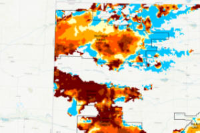

In [6]:
web_map_item = gis.content.get("069932d53b484b7d9ca6950d507fe2ea")

web_map_item

In [34]:
df = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df=df[df["Date"] < '2022-12-31']
df = df[(df['Date'].dt.month >= 4) & (df['Date'].dt.month <= 9)]
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.rename(columns={"fid": "FieldID"}, inplace =True)
df.columns

Index(['Date', 'FieldID', 'MinTemp', 'MaxTemp', 'ReferenceET', 'Precipitation',
       'Year', 'Month'],
      dtype='object')

In [35]:
df.groupby(["FieldID","Year"])["Precipitation"].sum()[85:120]

FieldID  Year
NW3      2006    326.364212
         2007    453.013920
         2008    451.696002
         2009    560.842607
         2010    427.822629
         2011    469.903087
         2012    241.193920
         2013    346.770343
         2014    441.803128
         2015    471.372566
         2016    557.399996
         2017    570.466666
         2018    468.466668
         2019    490.733331
         2020    266.266665
         2021    293.366668
         2022    247.566666
NW4      2006    325.653629
         2007    457.955982
         2008    451.825070
         2009    563.944957
         2010    421.415603
         2011    471.403176
         2012    243.543932
         2013    348.864410
         2014    443.265342
         2015    473.039050
         2016    567.299997
         2017    570.699998
         2018    466.200003
         2019    486.899998
         2020    262.399999
         2021    301.500002
         2022    252.100000
NW5      2006    325.653629
Name: 

In [36]:
df.groupby(["FieldID","Year"])["ReferenceET"].sum()[85:120]

FieldID  Year
NW3      2006    1116.073710
         2007    1044.912509
         2008    1041.128677
         2009     932.827558
         2010    1101.584423
         2011    1150.429758
         2012    1299.556115
         2013    1106.851682
         2014    1046.487867
         2015    1042.156149
         2016    1039.466667
         2017    1033.866662
         2018    1061.566666
         2019    1004.433335
         2020    1142.300003
         2021    1086.999999
         2022    1219.066669
NW4      2006    1117.372445
         2007    1046.152212
         2008    1042.187867
         2009     933.902055
         2010    1103.187689
         2011    1150.427785
         2012    1300.348591
         2013    1107.278792
         2014    1047.048501
         2015    1042.964744
         2016    1039.600000
         2017    1034.399995
         2018    1062.600000
         2019    1005.300001
         2020    1143.800002
         2021    1087.300000
         2022    1219.900003


In [37]:
ydf= pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv")
ydf

Unnamed: 0  Year FieldID cropType  Reported_Irrigation_x  \
0             0  2016     NB1     Corn             300.984585   
1             1  2017     NB1     Corn             297.575357   
2             2  2018     NB1     Corn             369.860074   
3             3  2019     NB1     Corn             255.200892   
4             4  2020     NB1     Corn             342.563728   
..          ...   ...     ...      ...                    ...   
136         138  2010     NW5     Corn                    NaN   
137         139  2011     NW5     Corn                    NaN   
138         140  2012     NW5     Corn                    NaN   
139         141  2013     NW5     Corn                    NaN   
140         142  2014     NW5     Corn                    NaN   

     Reported_Irrigation_y  Reported_Irrigation  Reported_Yield  
0               300.984585           300.984585       12.428670  
1               297.575357           297.575357       10.184502  
2               369.860074           369.860074       13.101181  
3               255.200892           255.200892       10.076228  
4               342.563728           342.563728        8.171677  
..                     ...                  ...             ...  
136                    NaN                  NaN       10.427278  
137                    NaN                  NaN        7.873083  
138                    NaN                  NaN        8.400331  
139                    NaN                  NaN       12.098467  
140                    NaN                  NaN       12.547705  

[141 rows x 8 columns]

In [21]:
ydf[ydf.cropType.isna()]

Unnamed: 0  Year FieldID cropType  Reported_Irrigation_x  \
99          101  2020     NW6      NaN                    NaN   
100         102  2021     NW6      NaN                    NaN   
101         103  2018     NW7      NaN                    NaN   
102         104  2019     NW7      NaN                    NaN   

     Reported_Irrigation_y  Reported_Irrigation  Reported_Yield  
99              357.192081           357.192081             NaN  
100             558.413801           558.413801             NaN  
101             361.145528           361.145528             NaN  
102             263.694472           263.694472             NaN

In [27]:
ydf[ydf.FieldID=="WC8"]

Unnamed: 0  Year FieldID cropType  Reported_Irrigation_x  \
90          90  2016     WC8     Corn                424.434   
91          91  2020     WC8     Corn                544.068   

    Reported_Irrigation_y  Reported_Irrigation  Reported_Yield  
90                    NaN              424.434             NaN  
91                    NaN              544.068             NaN

In [31]:
nw2 = df[df.FieldID =="NW5"]
nw2.groupby("Year")["Precipitation"].sum()

Year
2006    325.653629
2007    457.955982
2008    451.825070
2009    563.944957
2010    421.415603
2011    471.403176
2012    243.543932
2013    348.864410
2014    443.265342
2015    473.039050
2016    567.299997
2017    570.699998
2018    466.200003
2019    486.899998
2020    262.399999
2021    301.500002
2022    252.100000
Name: Precipitation, dtype: float64

In [38]:
ydf= pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv")
ydf = ydf[["Reported_Irrigation","Reported_Yield", "Year","FieldID" ]]
yld_df = ydf[["Reported_Yield", "Year","FieldID" ]]
yld_df = yld_df.dropna(subset = ["Reported_Yield"])
yld_df.FieldID.unique()


array(['NB1', 'NC1', 'NC2', 'NW1', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6',
       'NW7'], dtype=object)

In [39]:
irr_df = pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv")
irr_df = irr_df[["Reported_Irrigation", "Year","FieldID" ]]
irr_df  = irr_df.dropna(subset = ["Reported_Irrigation"])
irr_df 

Reported_Irrigation  Year FieldID
0             300.984585  2016     NB1
1             297.575357  2017     NB1
2             369.860074  2018     NB1
3             255.200892  2019     NB1
4             342.563728  2020     NB1
..                   ...   ...     ...
98            362.713507  2015     NB1
99            357.192081  2020     NW6
100           558.413801  2021     NW6
101           361.145528  2018     NW7
102           263.694472  2019     NW7

[103 rows x 3 columns]

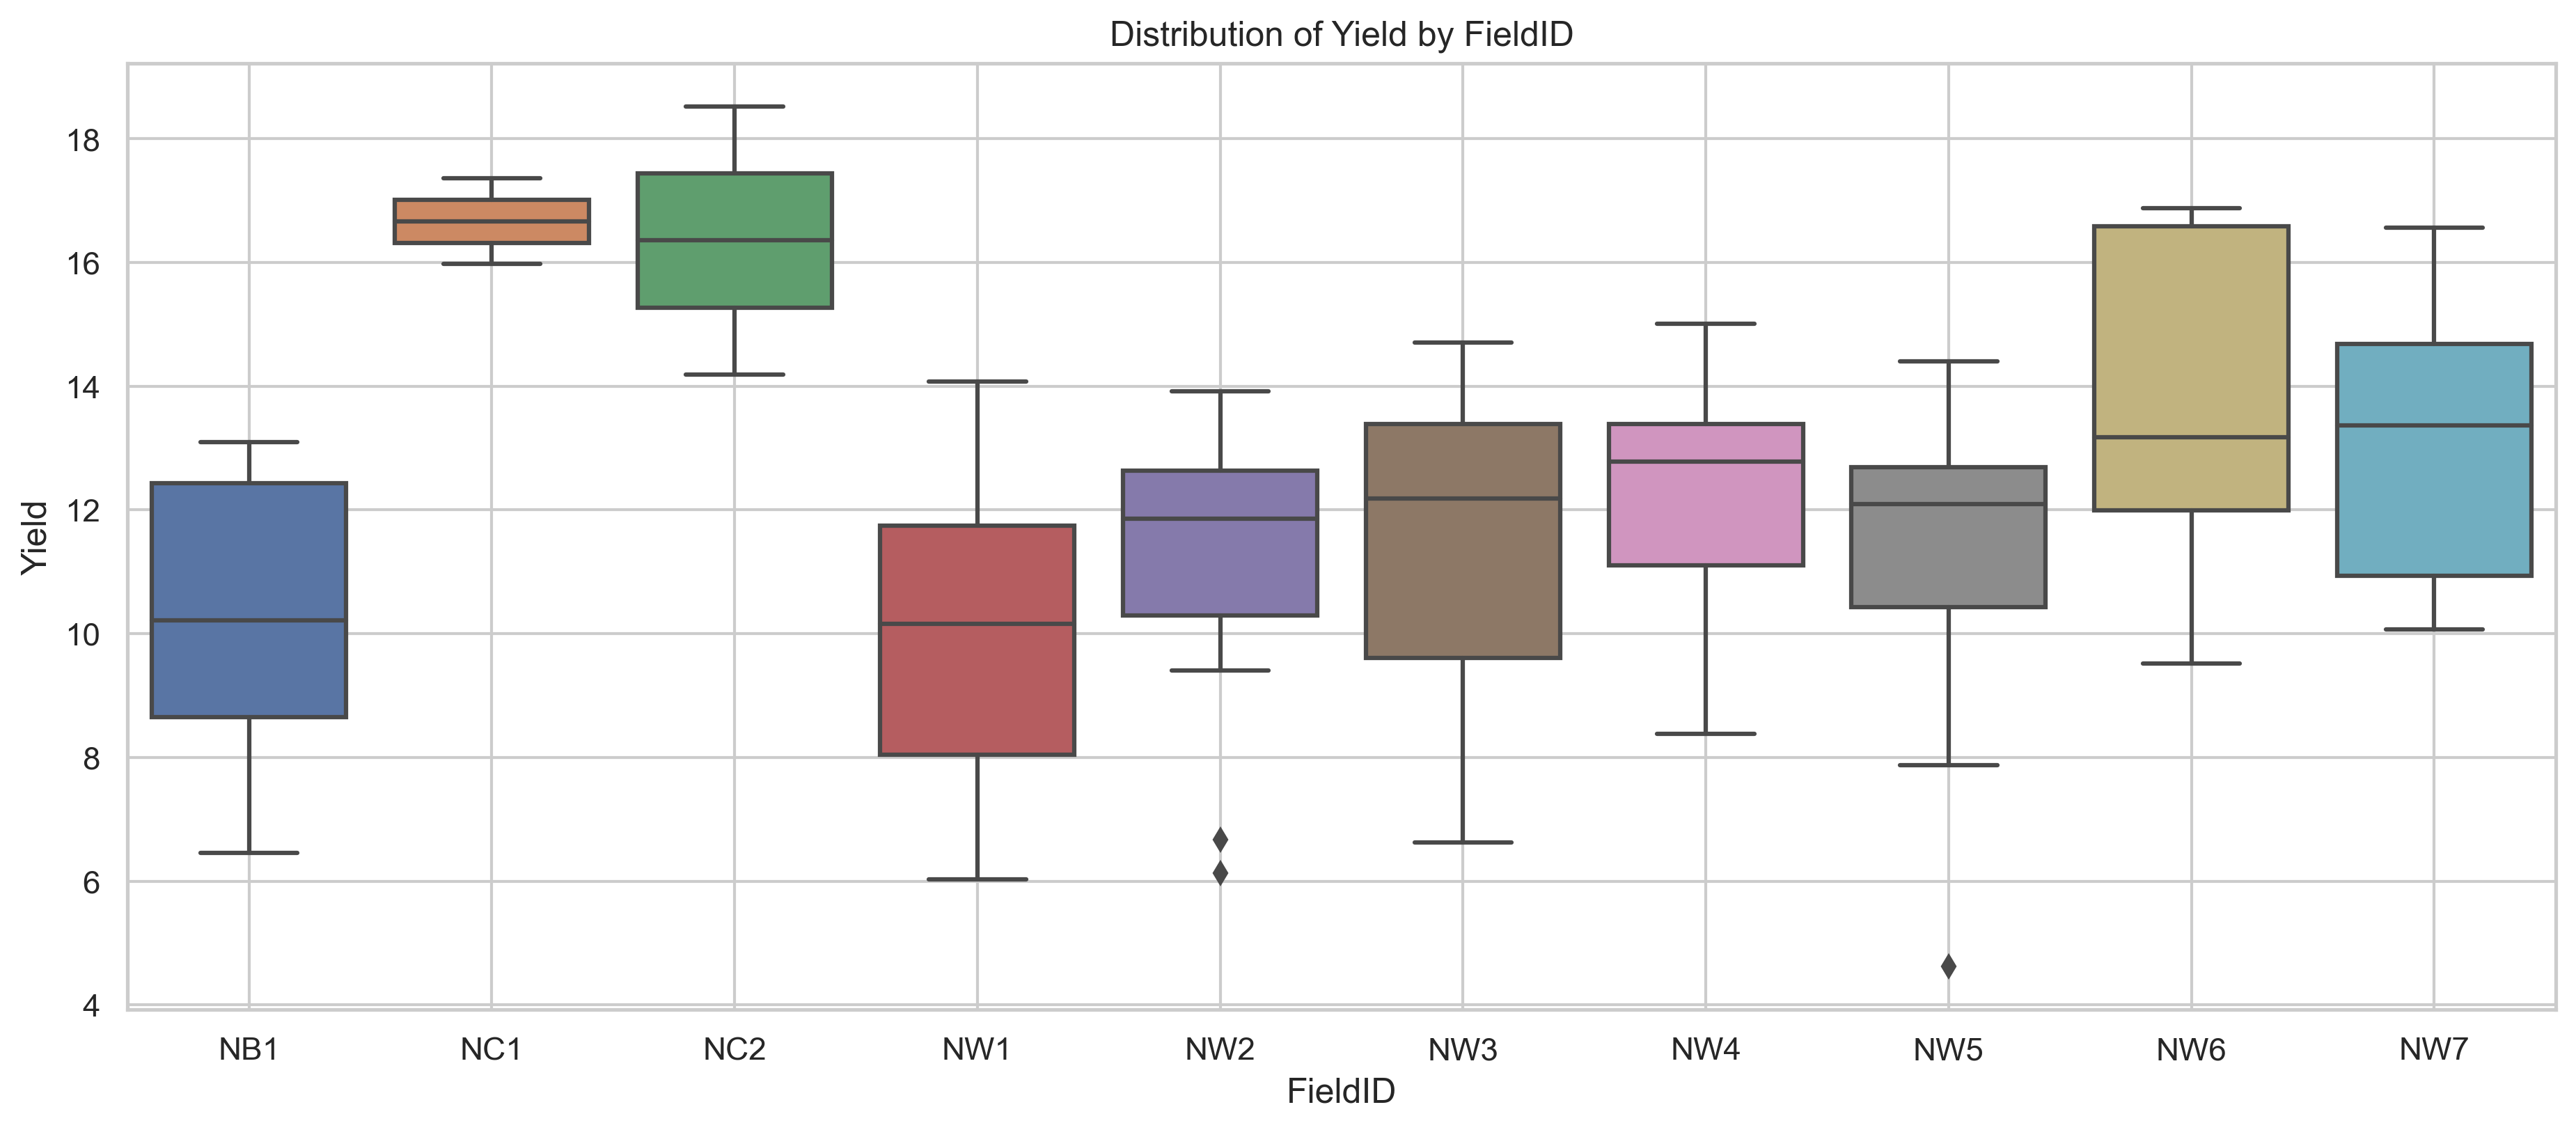

In [40]:

plt.figure(figsize=(15, 6))
sns.boxplot(data=yld_df, x="FieldID", y="Reported_Yield")
plt.xlabel('FieldID')
plt.ylabel('Yield')
plt.title('Distribution of Yield by FieldID')
plt.grid(True)
plt.show()

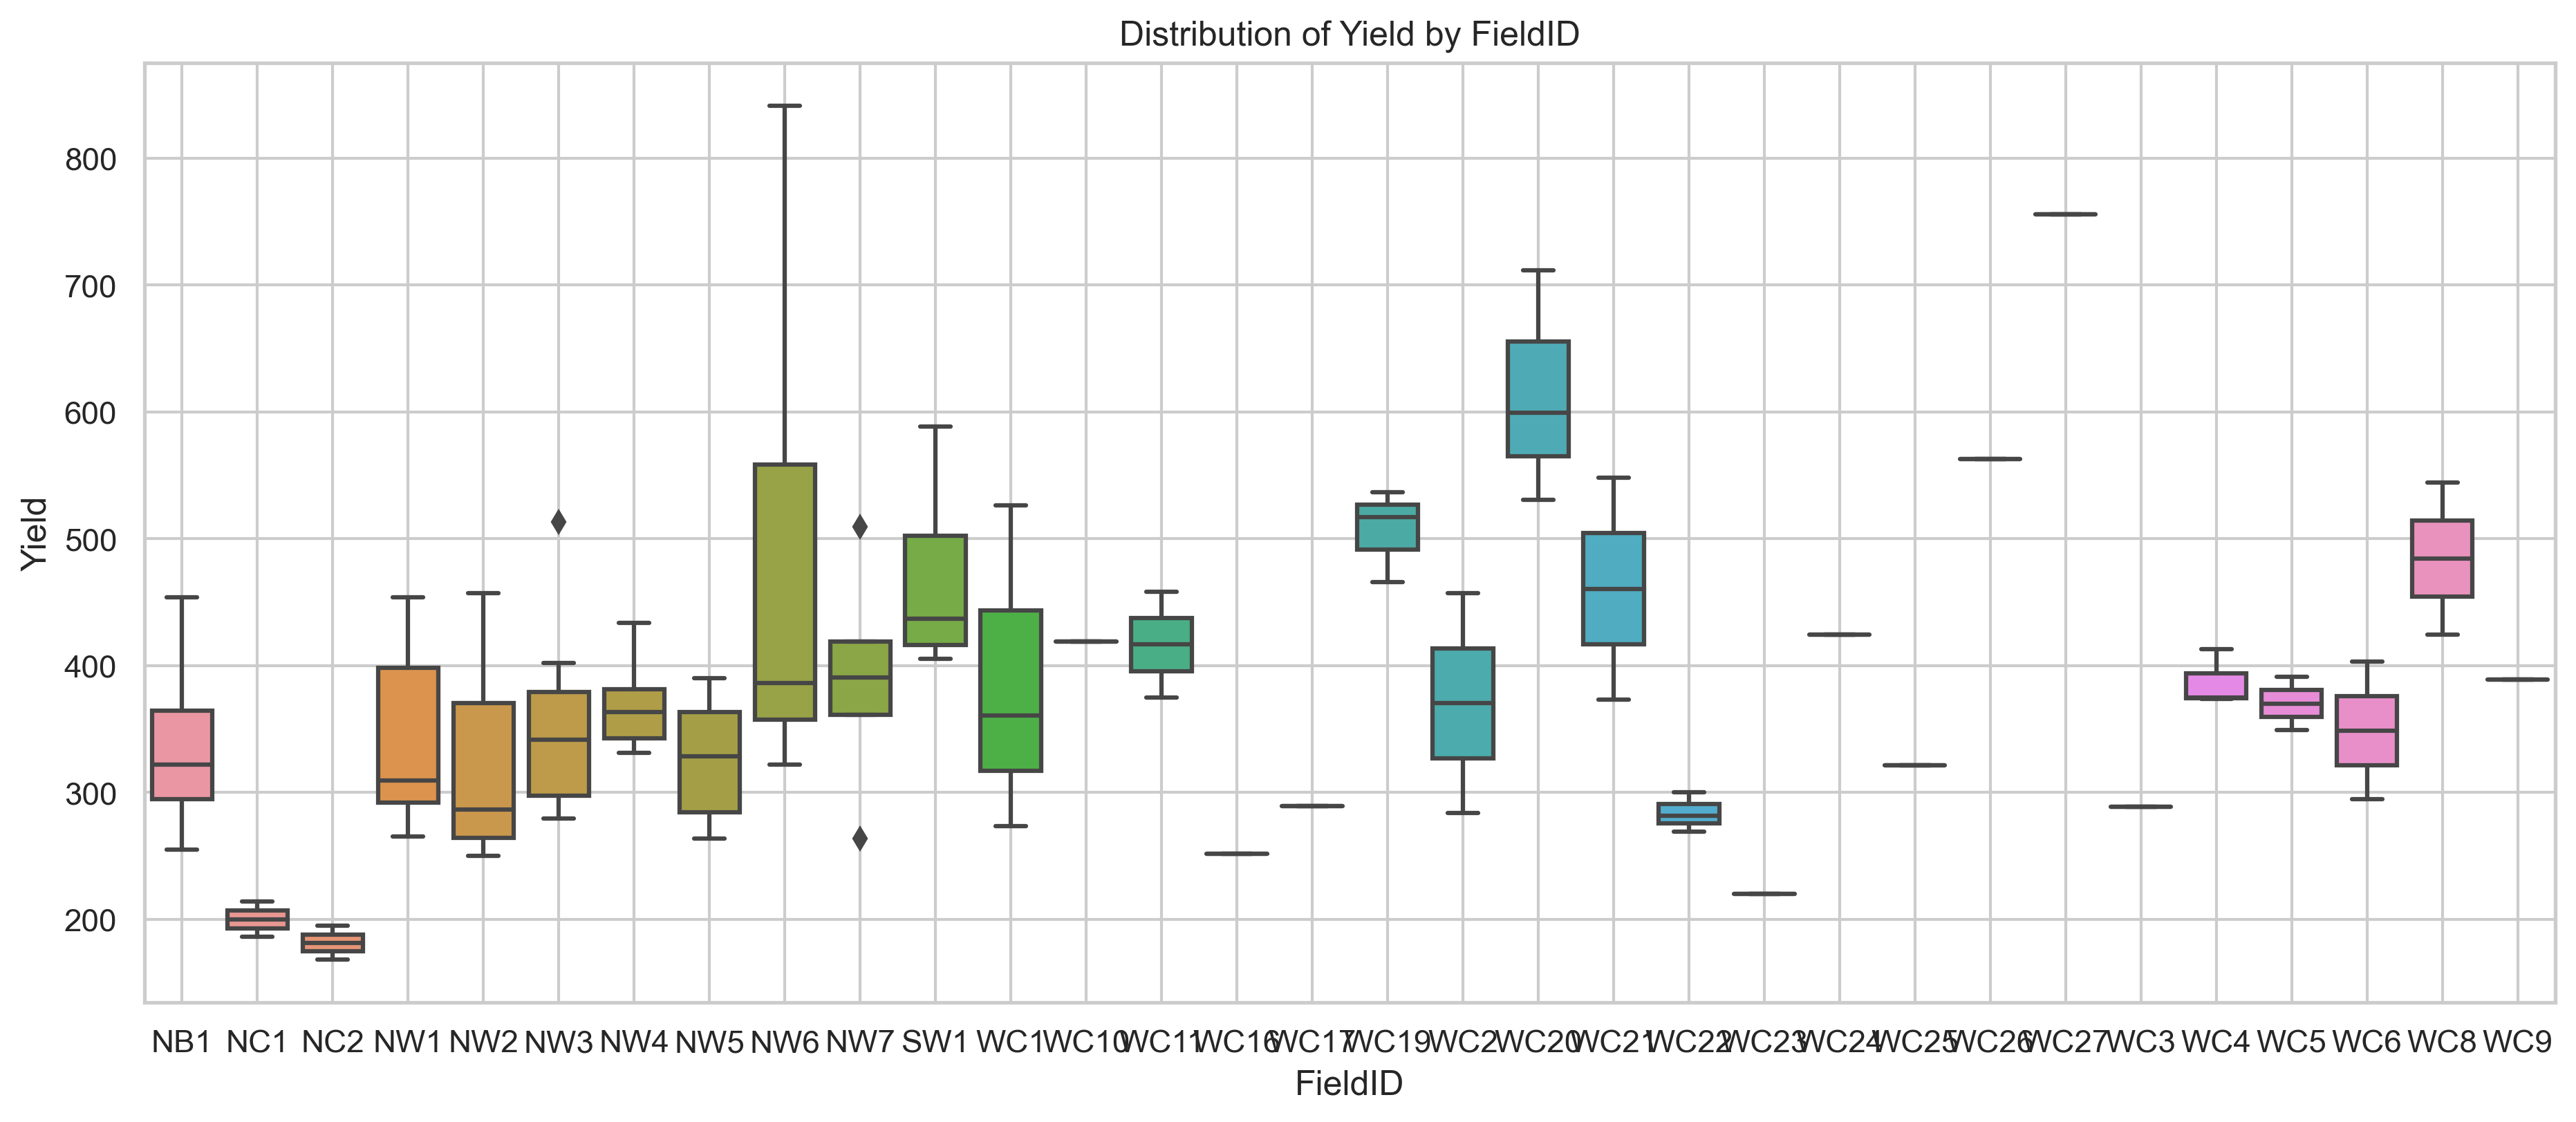

In [41]:

plt.figure(figsize=(15, 6))
sns.boxplot(data=irr_df, x="FieldID", y="Reported_Irrigation")
plt.xlabel('FieldID')
plt.ylabel('Yield')
plt.title('Distribution of Yield by FieldID')
plt.grid(True)
plt.show()

In [27]:
# ydff= pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv")

# years_to_include = [2012, 2020, 2022]
# fields_to_exclude_2022 = ['NW3', 'NW5']

# # Apply the filtering conditions
# ydff= ydff[
#     (ydff['Year'].isin([2012, 2020, 2022])) &  # Include specified years
#     ~((ydff['FieldID'].isin(['NW3', 'NW5'])) & (ydff['Year'] == 2022))  # Exclude 2022 for specified fields
# ]

# # Display the result
# ydff

In [28]:
# at first look for dry years (2012, 20,21, next place would be 2007 but we wont consider that)
# then just filter those yars and delete nw5,3


let's see how far NW2 and NW4 are then see why in 2013 one field does better than other, see their climate data 
and soil type.
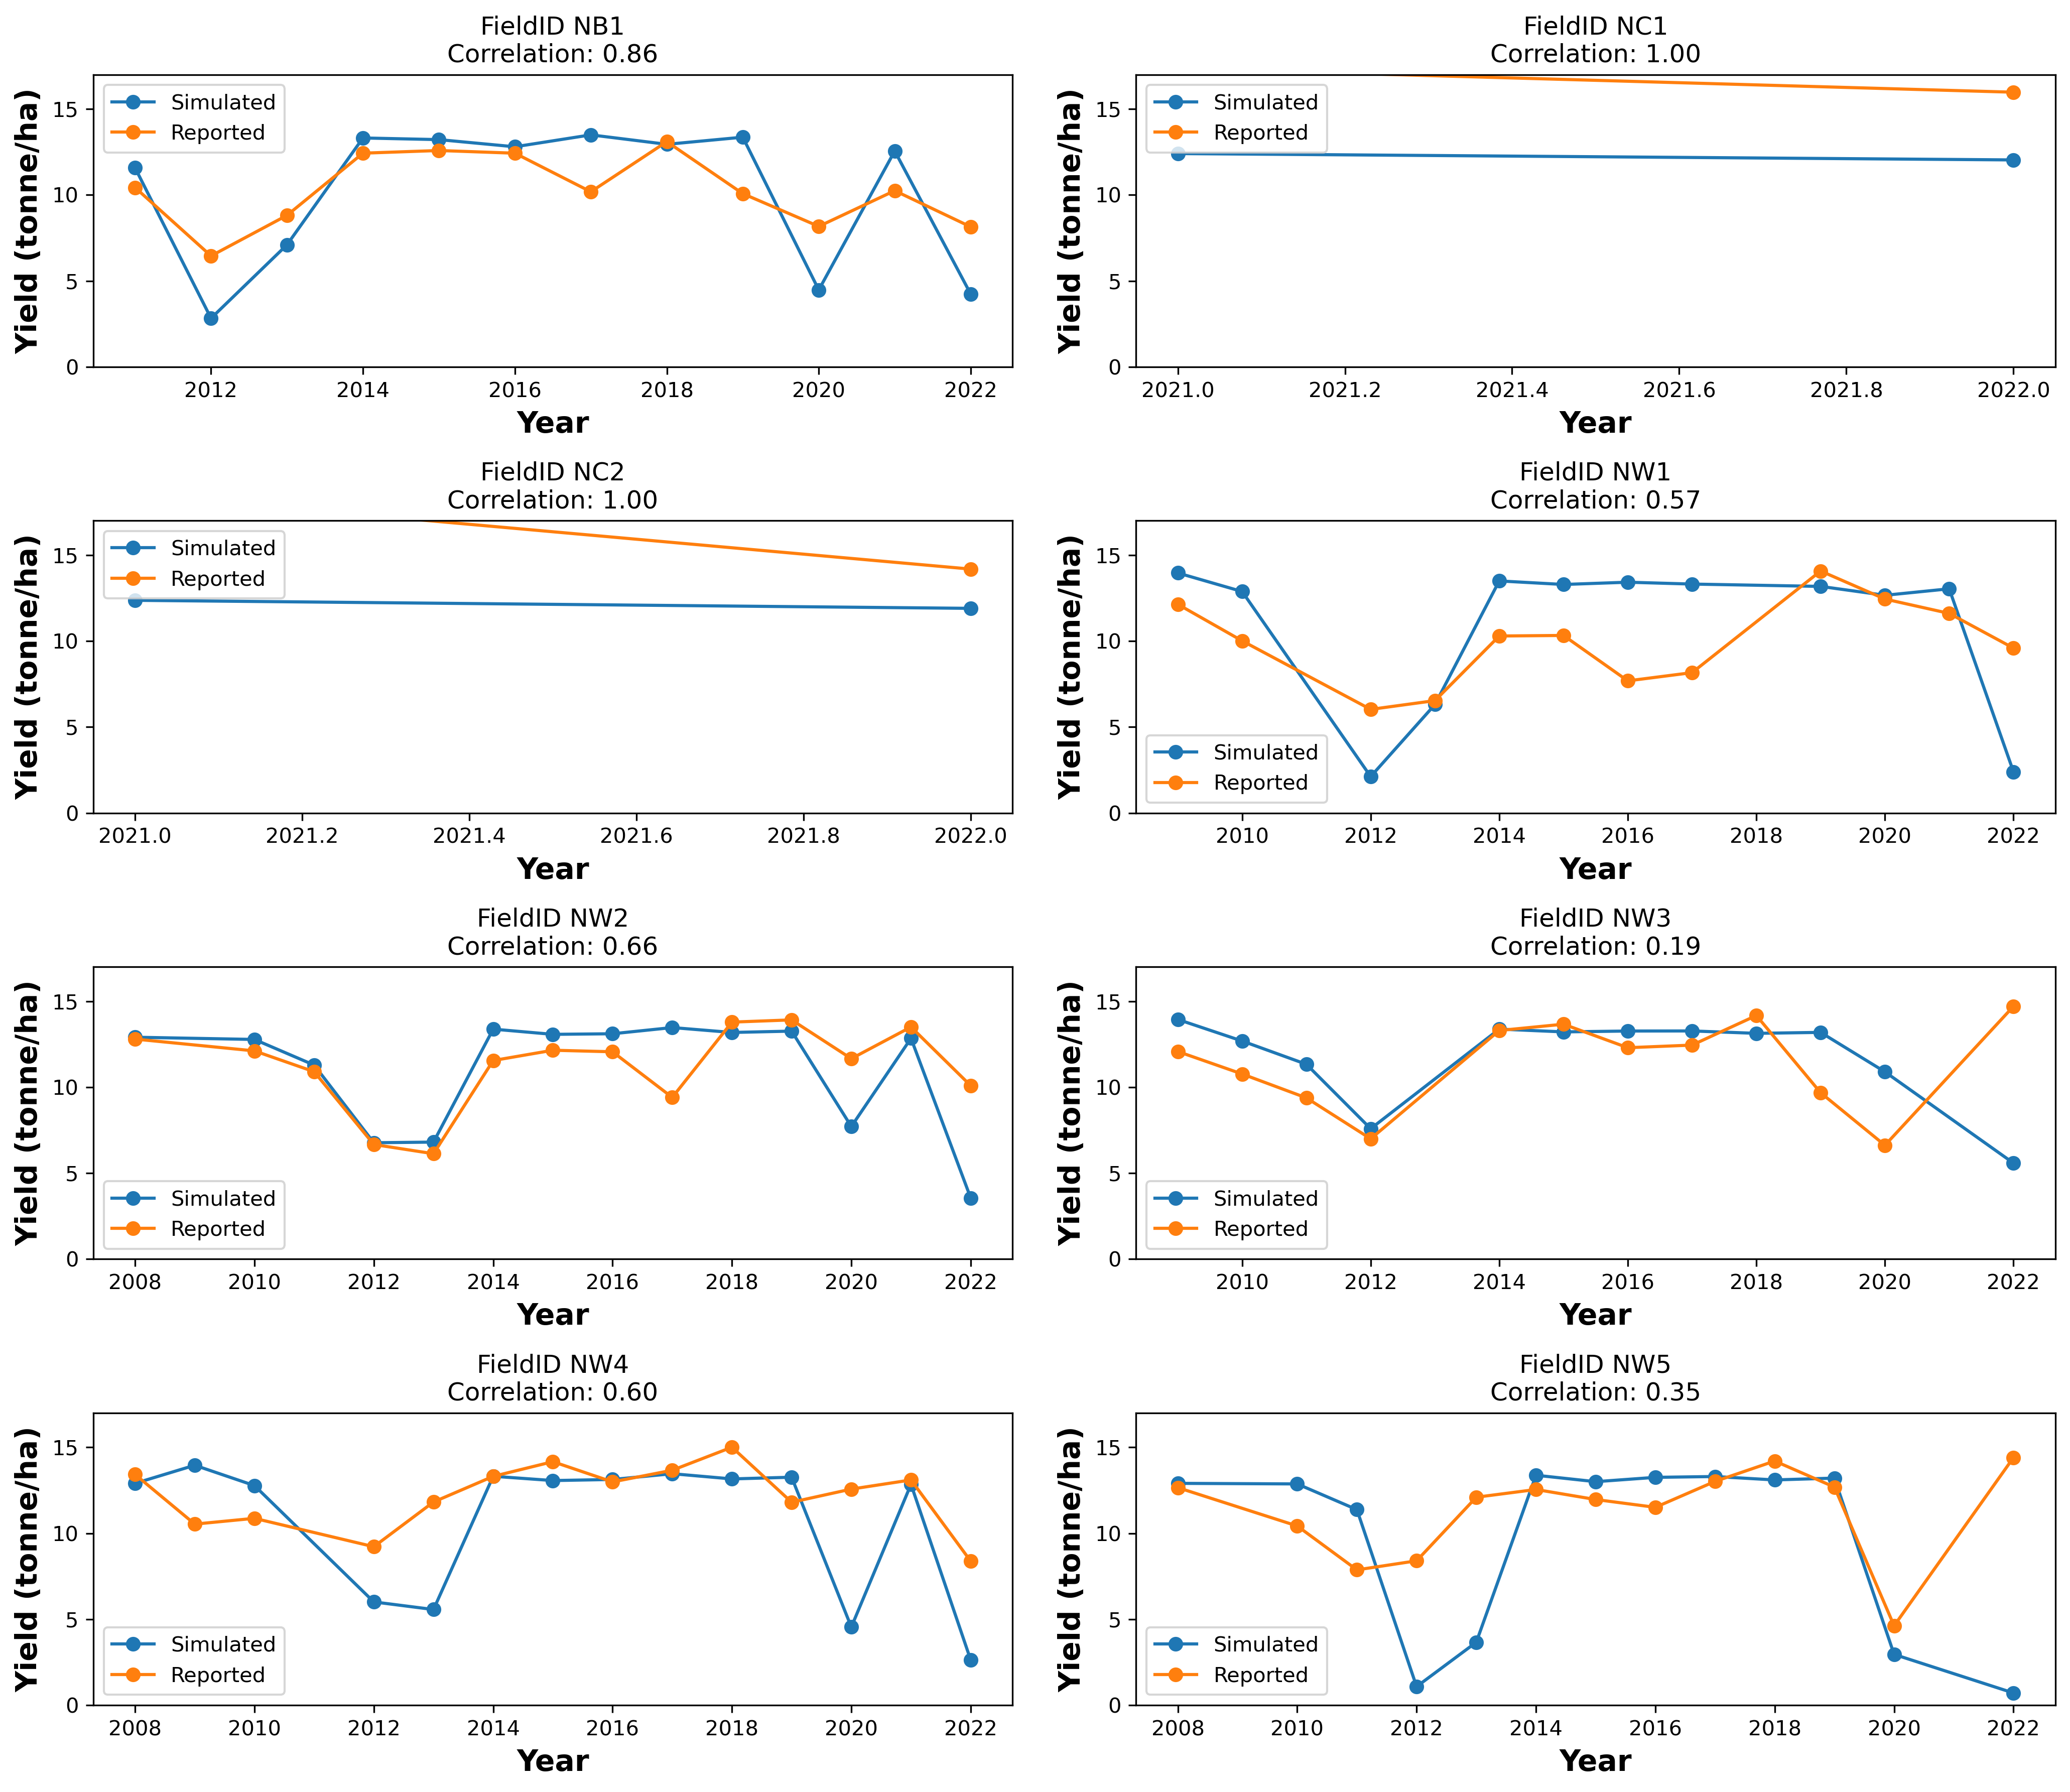
if we look at this image, we can see that NW2 and NW3 did pretty well in 2012 but didn't do well in 2022.
we may see how 2012 and 2022 data differe, investigate precipitation stress timing.
But NW5 and NW1 did quite bad in 2012; assuming same weather data for nw2,nw3,nw4,nw5 and givent that their simulated irrigation was constant (look into that) what could be the reason for that)

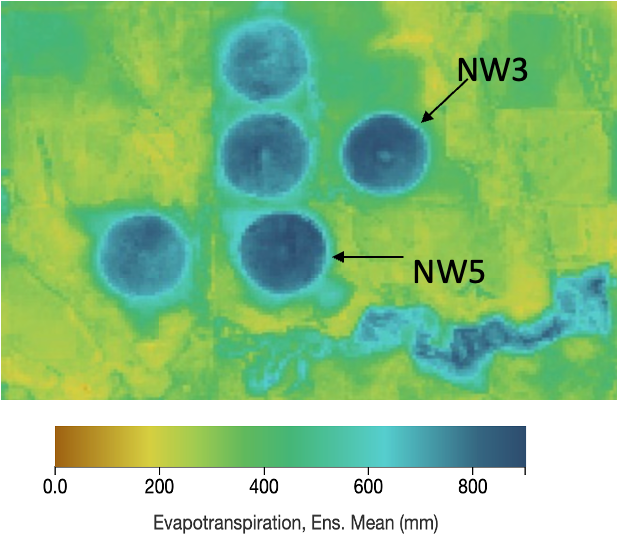

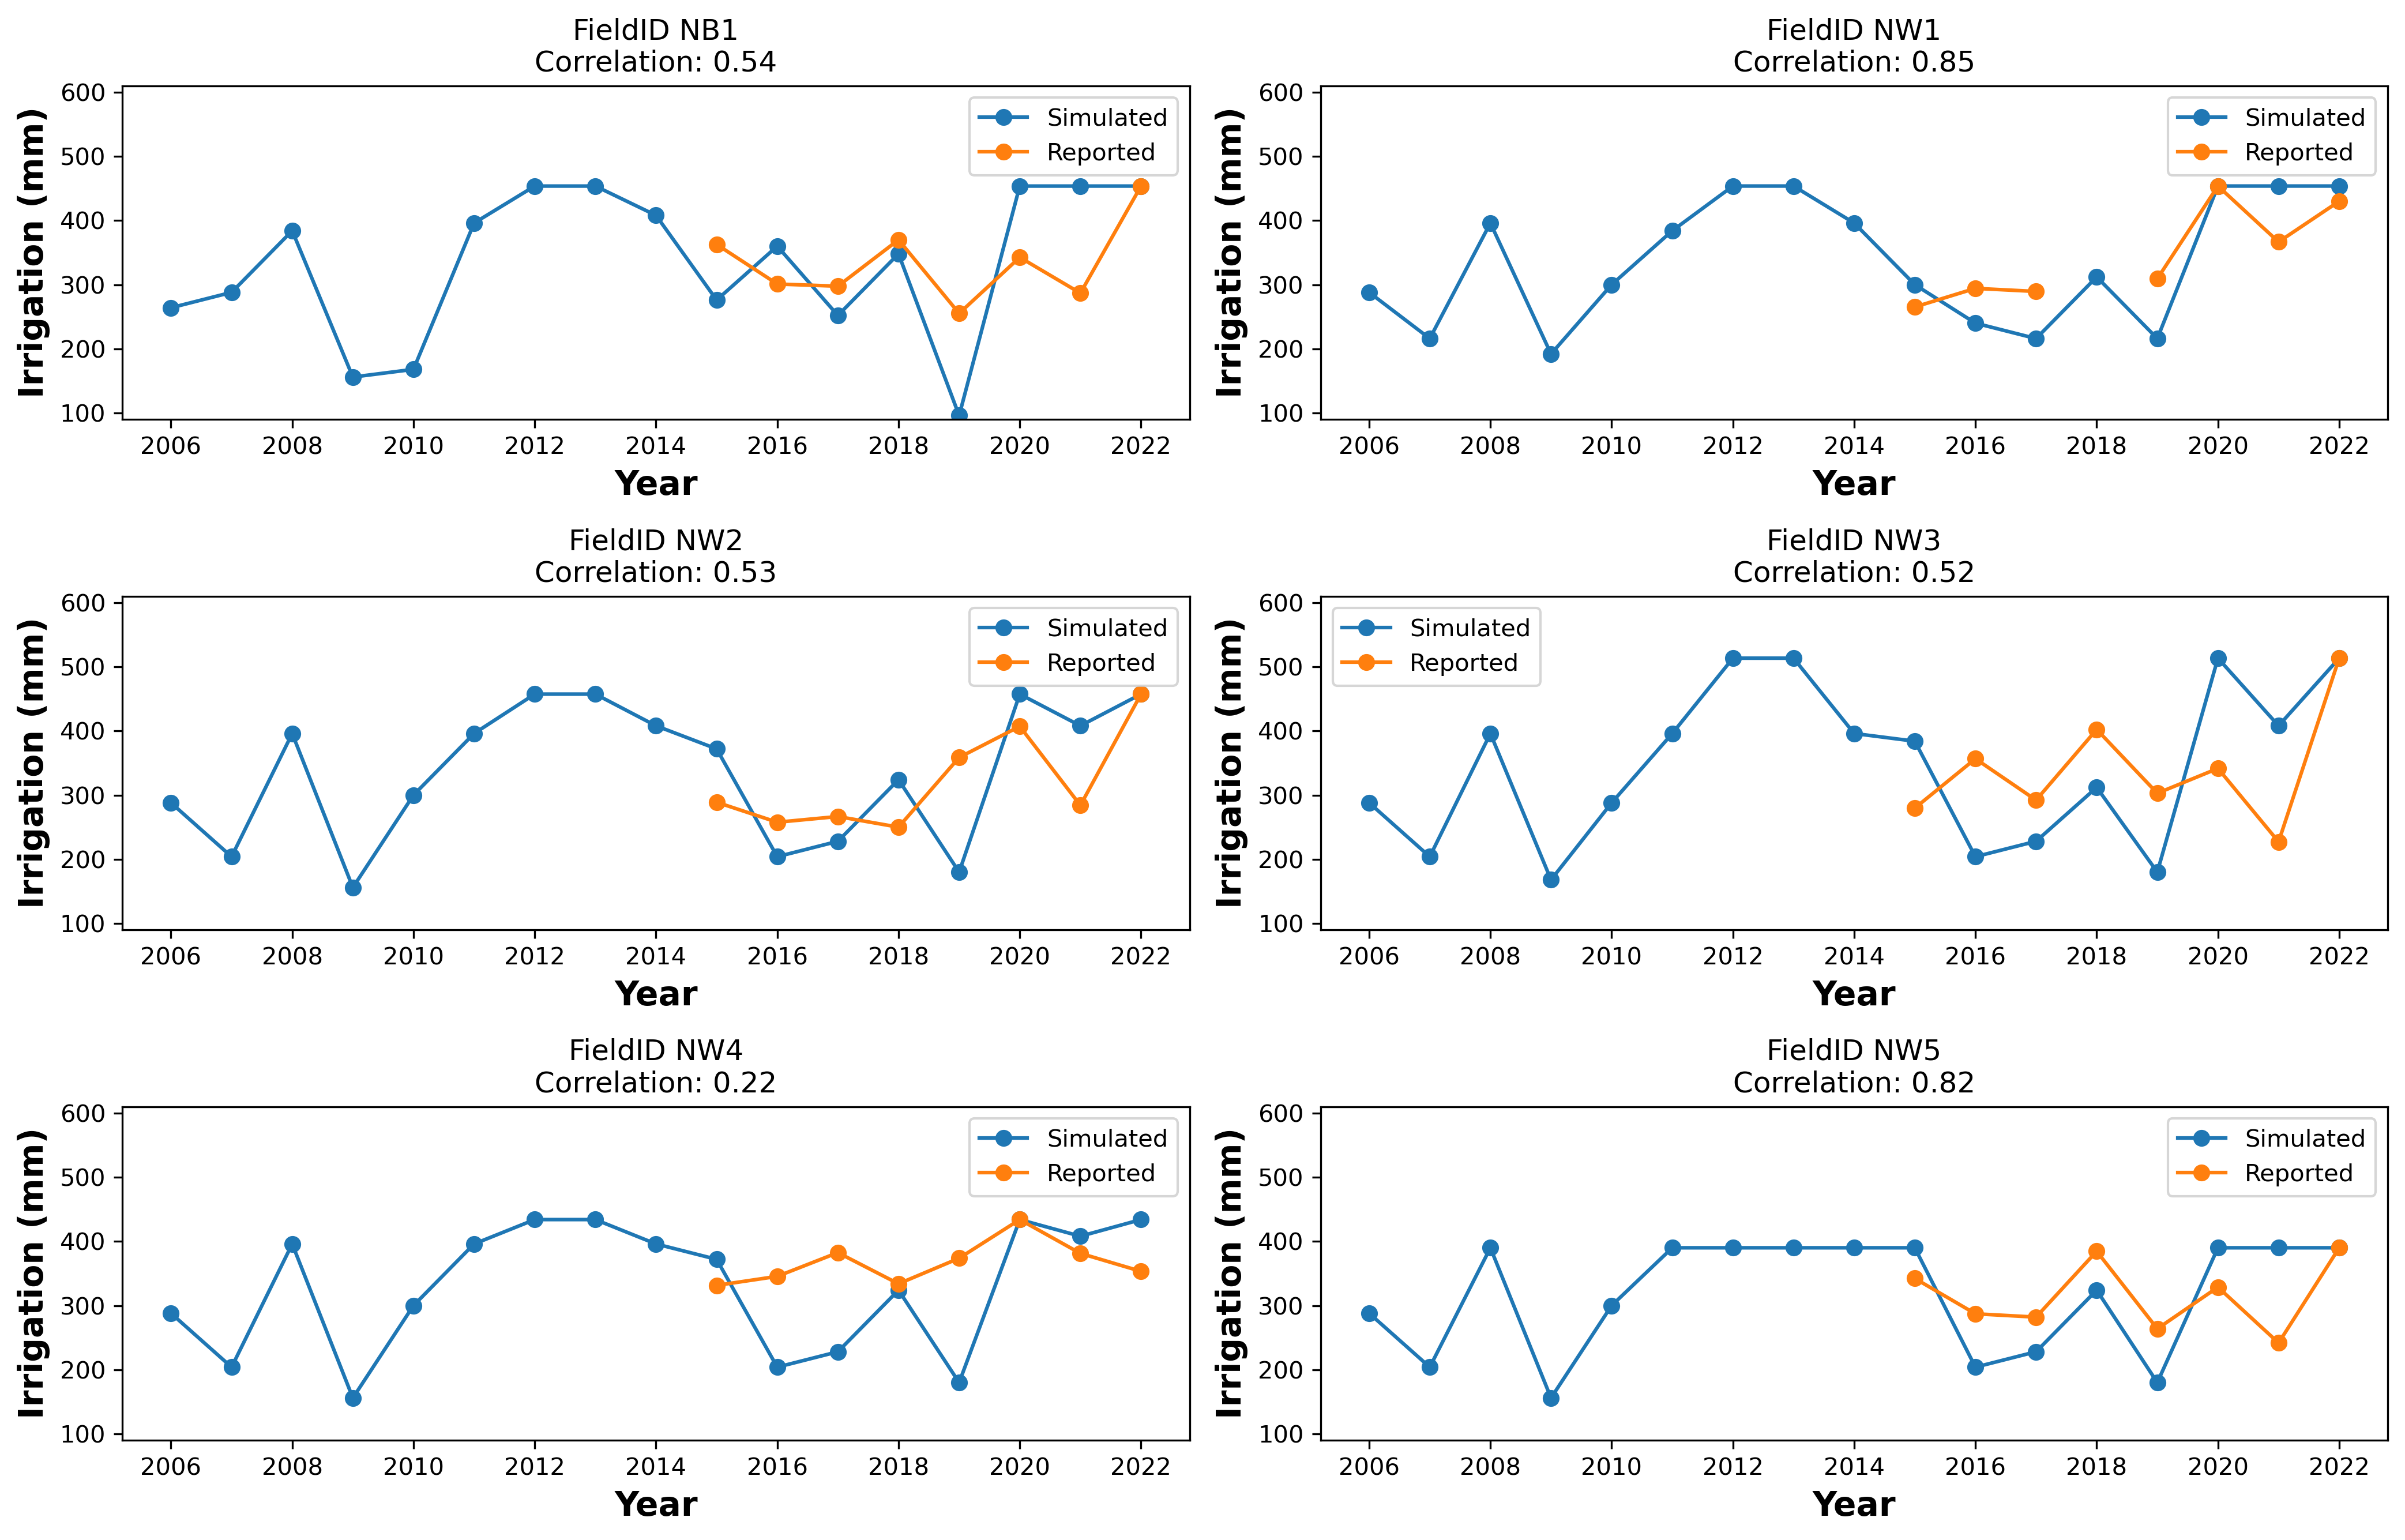

- WC fields



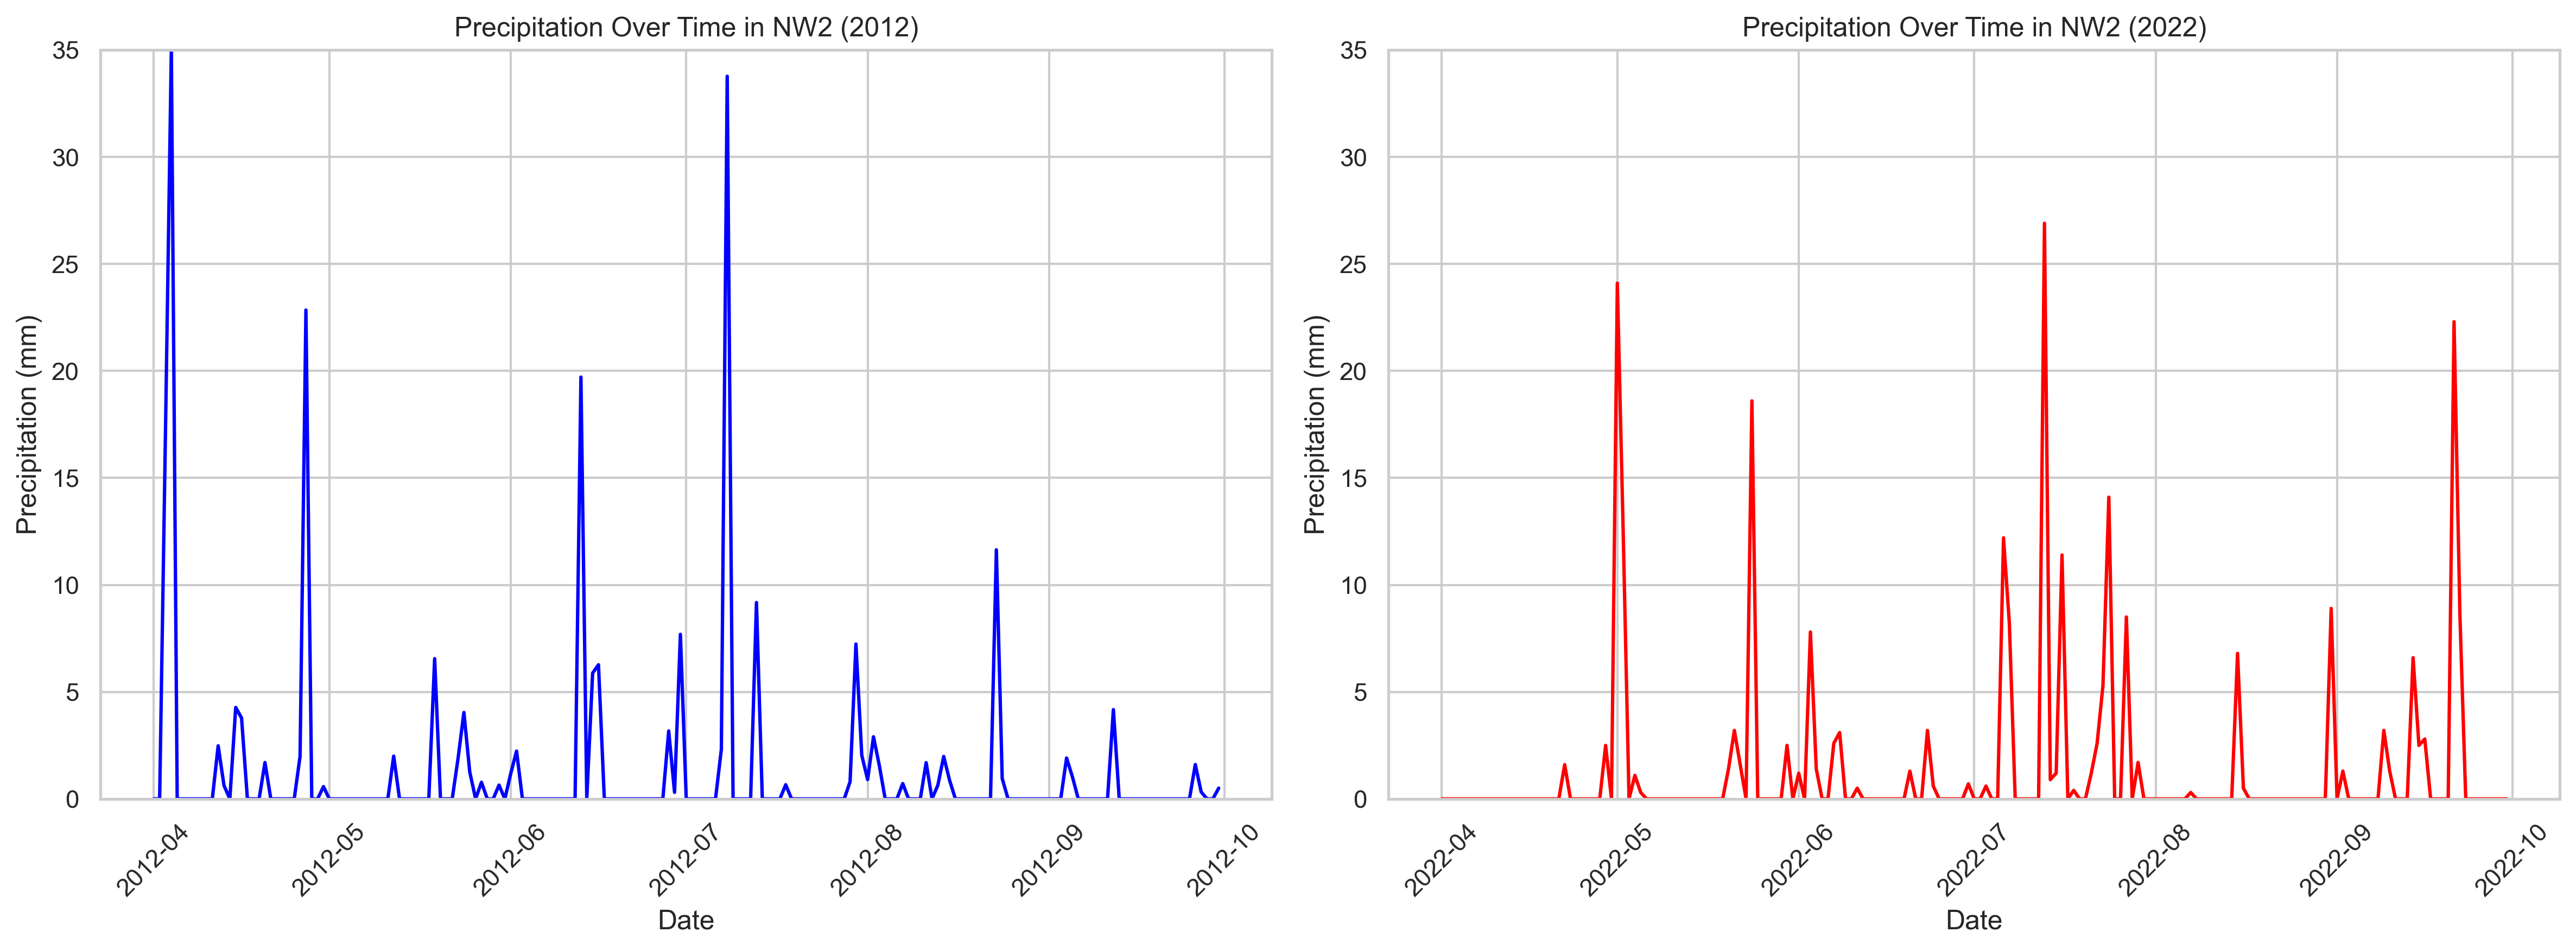

In [43]:
nw2_2012 = nw2[nw2['Date'].dt.year == 2012]
nw2_2022 = nw2[nw2['Date'].dt.year == 2022]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 2012
sns.lineplot(x='Date', y='Precipitation', data=nw2_2012, ax=axes[0], color='blue')
axes[0].set_title('Precipitation Over Time in NW2 (2012)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Precipitation (mm)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0].set_ylim(0, 35)  # Set y-axis limit to 35

# Plot for 2022
sns.lineplot(x='Date', y='Precipitation', data=nw2_2022, ax=axes[1], color='red')
axes[1].set_title('Precipitation Over Time in NW2 (2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[1].set_ylim(0, 35)  # Set y-axis limit to 35

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

NW2_precip and NW5 precip same, meaning e are using same data

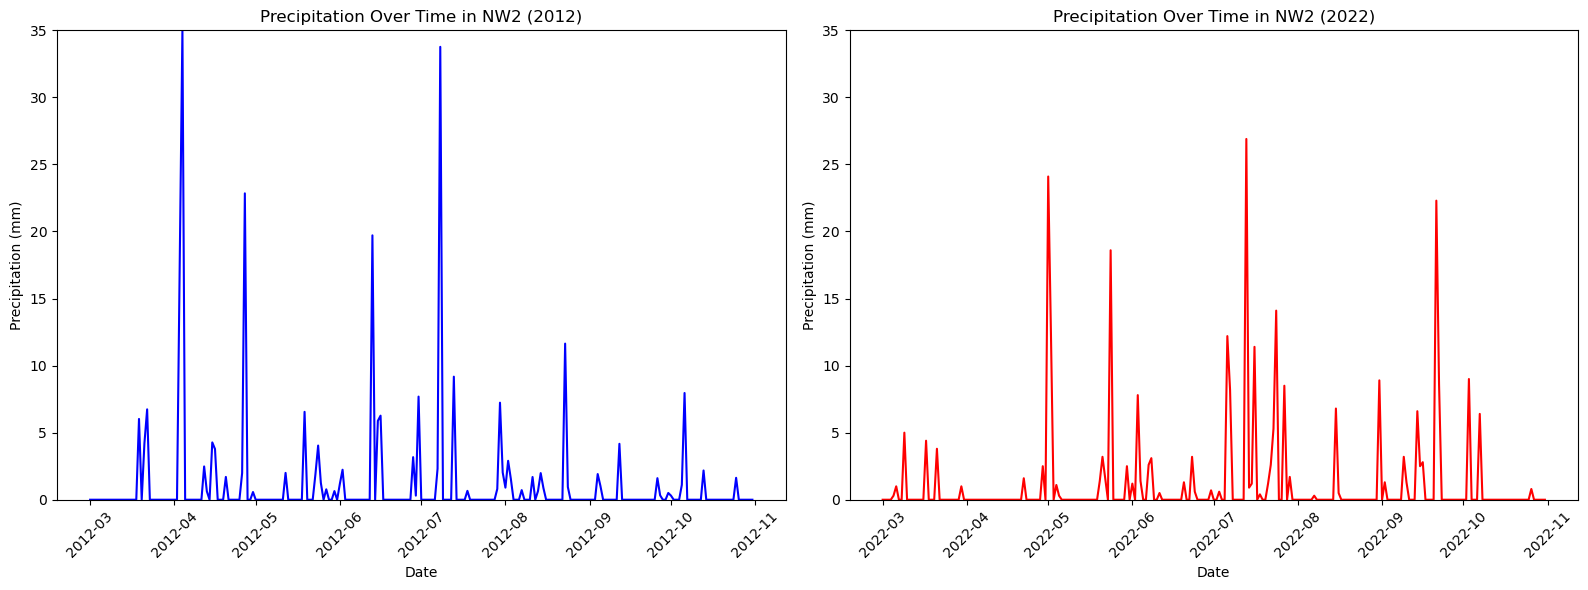


In [31]:
nw2.groupby(["Year"])["Precipitation"].sum() , so 2022 experienced slightly higher precip

SyntaxError: invalid syntax (3879806801.py, line 1)

In [32]:

# Count non-zero precipitation events for 2012
non_zero_2012 = nw2_2012[nw2_2012['Precipitation'] > 0].shape[0]

# Count non-zero precipitation events for 2022
non_zero_2022 = nw2_2022[nw2_2022['Precipitation'] > 0].shape[0]

# Print the results
print(f"Number of non-zero precipitation events in 2012: {non_zero_2012}")
print(f"Number of non-zero precipitation events in 2022: {non_zero_2022}")

Number of non-zero precipitation events in 2012: 48
Number of non-zero precipitation events in 2022: 47


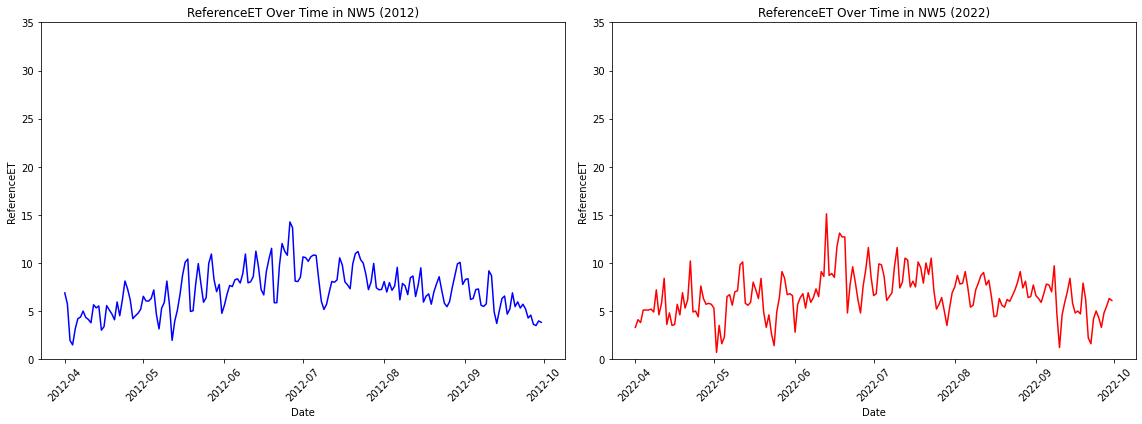

In [7]:

def plot_comparison(df, x_col, y_col, year1, year2, y_limit=35):
    """
    Plots a comparison of a specified y-axis column over time for two specified years side by side.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The column name for the x-axis (e.g., 'Date').
        y_col (str): The column name for the y-axis (e.g., 'Precipitation').
        year1 (int): The first year to plot.
        year2 (int): The second year to plot.
        y_limit (int): The upper limit for the y-axis (default is 35).
    """
    # Convert the x_col column to datetime (if not already)
    df[x_col] = pd.to_datetime(df[x_col])
    x =', '.join(df['FieldID'].astype(str))
    # Filter data for the two specified years
    df_year1 = df[df[x_col].dt.year == year1]
    df_year2 = df[df[x_col].dt.year == year2]

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot for year1
    sns.lineplot(x=x_col, y=y_col, data=df_year1, ax=axes[0], color='blue')
    axes[0].set_title(f'{y_col} Over Time in {x[:3]} ({year1})')
    axes[0].set_xlabel(x_col)
    axes[0].set_ylabel(y_col)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[0].set_ylim(0, y_limit)  # Set y-axis limit

    # Plot for year2
    sns.lineplot(x=x_col, y=y_col, data=df_year2, ax=axes[1], color='red')
    axes[1].set_title(f'{y_col} Over Time in {x[:3]} ({year2})')
    axes[1].set_xlabel(x_col)
    axes[1].set_ylabel(y_col)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[1].set_ylim(0, y_limit)  # Set y-axis limit

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()
    
    
# Example usage
plot_comparison(df=df[df.FieldID =="NW5"], x_col='Date', y_col='ReferenceET', year1=2012, year2=2022, y_limit=35)

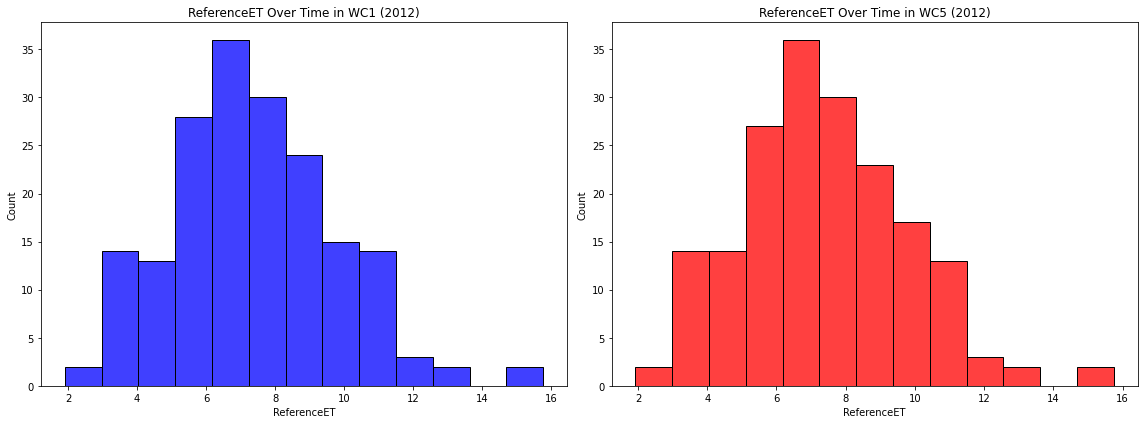

In [23]:
def twofields_comparison(df1, df2, col, year, y_limit=35):
    """
    Plots a comparison of a specified y-axis column over time for two specified years side by side.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The column name for the x-axis (e.g., 'Date').
        y_col (str): The column name for the y-axis (e.g., 'Precipitation').
        year1 (int): The first year to plot.
        year2 (int): The second year to plot.
        y_limit (int): The upper limit for the y-axis (default is 35).
    """

    x =', '.join(df1['FieldID'].astype(str))
    # Filter data for the two specified years
    df1_year = df1[df1["Year"] == year]
    df2_year = df2[df2["Year"] == year]

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot for year1
    sns.histplot(df1_year[col], ax=axes[0], color='blue')
    axes[0].set_title(f'{col} Over Time in {x[:3]} ({year})')
#     axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
#     axes[0].set_ylim(0, y_limit)  # Set y-axis limit

    # Plot for year2
    x =', '.join(df2['FieldID'].astype(str))
    sns.histplot(df2_year[col], ax=axes[1], color='red')
    axes[1].set_title(f'{col} Over Time in {x[:3]} ({year})')
#     axes[1].set_xlabel(x_col)
#     axes[1].set_ylabel(y_col)
#     axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
#     axes[1].set_ylim(0, y_limit)  # Set y-axis limit

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()
    
# ['MinTemp', 'MaxTemp', 'ReferenceET', 'Precipitation']
# Example usage
twofields_comparison(df1=df[df.FieldID =="WC1"], df2 = df[df.FieldID =="WC5"], 
                                                          col='ReferenceET', year=2012,  y_limit=35)
                                                           

## Let's try to add new crop type or do something with non crop years

In [24]:
df = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df =df[~df["fid"].isin(["NW6", "NW7"]) & df["fid"].str.startswith("NW")]
# df =df[df["fid"].str.startswith("NW")]
df

Date  fid   MinTemp    MaxTemp  ReferenceET  Precipitation
24     2006-01-01  NW1 -2.530035  11.797662     1.394940       1.365768
25     2006-01-01  NW2 -2.531226  11.660730     1.390496       1.365766
26     2006-01-01  NW3 -2.528489  11.643020     1.386481       1.304406
27     2006-01-01  NW4 -2.531226  11.660730     1.390496       1.365766
28     2006-01-01  NW5 -2.531226  11.660730     1.390496       1.365766
...           ...  ...       ...        ...          ...            ...
282620 2023-12-30  NW1 -5.250006   9.149988     1.400000       0.000000
282621 2023-12-30  NW2 -5.250006   9.050012     1.400000       0.000000
282622 2023-12-30  NW3 -5.216671   9.016677     1.400000       0.000000
282623 2023-12-30  NW4 -5.250006   9.050012     1.400000       0.000000
282624 2023-12-30  NW5 -5.250006   9.050012     1.400000       0.000000

[32865 rows x 6 columns]

In [25]:
plt.rcParams["figure.dpi"] = 300
unique_fids = df['fid'].unique()

# DataFrames to store results for all fids
all_ET_df = pd.DataFrame()
all_yld_df = pd.DataFrame()
all_gdd_df = pd.DataFrame()
all_maturity = pd.DataFrame()
# Iterate over each fid and run AquaCrop model
for fid in unique_fids:
    model, field_df, field_yld,x = run_aquacrop_model_for_fid(df, fid,sim_start = '2006/01/01',sim_end ='2022/12/30')

    # Append results to the aggregated DataFrames
    all_ET_df = all_ET_df.append(field_df, ignore_index=True)
    all_yld_df = all_yld_df.append(field_yld, ignore_index=True)
    all_gdd_df = all_gdd_df.append(model, ignore_index=True)
    all_maturity = all_maturity.append(x, ignore_index=True)
    
all_yld_df["Year"] = all_yld_df["Harvest Date (YYYY/MM/DD)"].dt.year
all_yld_df

Season crop Type Harvest Date (YYYY/MM/DD)  Harvest Date (Step)  \
0        0  MaizeGDD                2006-09-16                  257   
1        1  MaizeGDD                2007-09-19                  625   
2        2  MaizeGDD                2008-09-30                 1002   
3        3  MaizeGDD                2009-10-17                 1384   
4        4  MaizeGDD                2010-09-20                 1722   
..     ...       ...                       ...                  ...   
80      12  MaizeGDD                2018-09-18                 4642   
81      13  MaizeGDD                2019-09-26                 5015   
82      14  MaizeGDD                2020-09-02                 5357   
83      15  MaizeGDD                2021-09-17                 5737   
84      16  MaizeGDD                2022-08-19                 6073   

    Yield (tonne/ha)  Seasonal irrigation (mm) FieldID  Year  
0          12.281637                204.000000     NW1  2006  
1          11.782859                348.000000     NW1  2007  
2          12.818019                372.000000     NW1  2008  
3          13.439349                264.000000     NW1  2009  
4          12.414974                288.000000     NW1  2010  
..               ...                       ...     ...   ...  
80         12.834593                288.000000     NW5  2018  
81         12.598300                312.000000     NW5  2019  
82          2.016907                390.011099     NW5  2020  
83         12.095230                390.011099     NW5  2021  
84          0.560902                390.011099     NW5  2022  

[85 rows x 8 columns]

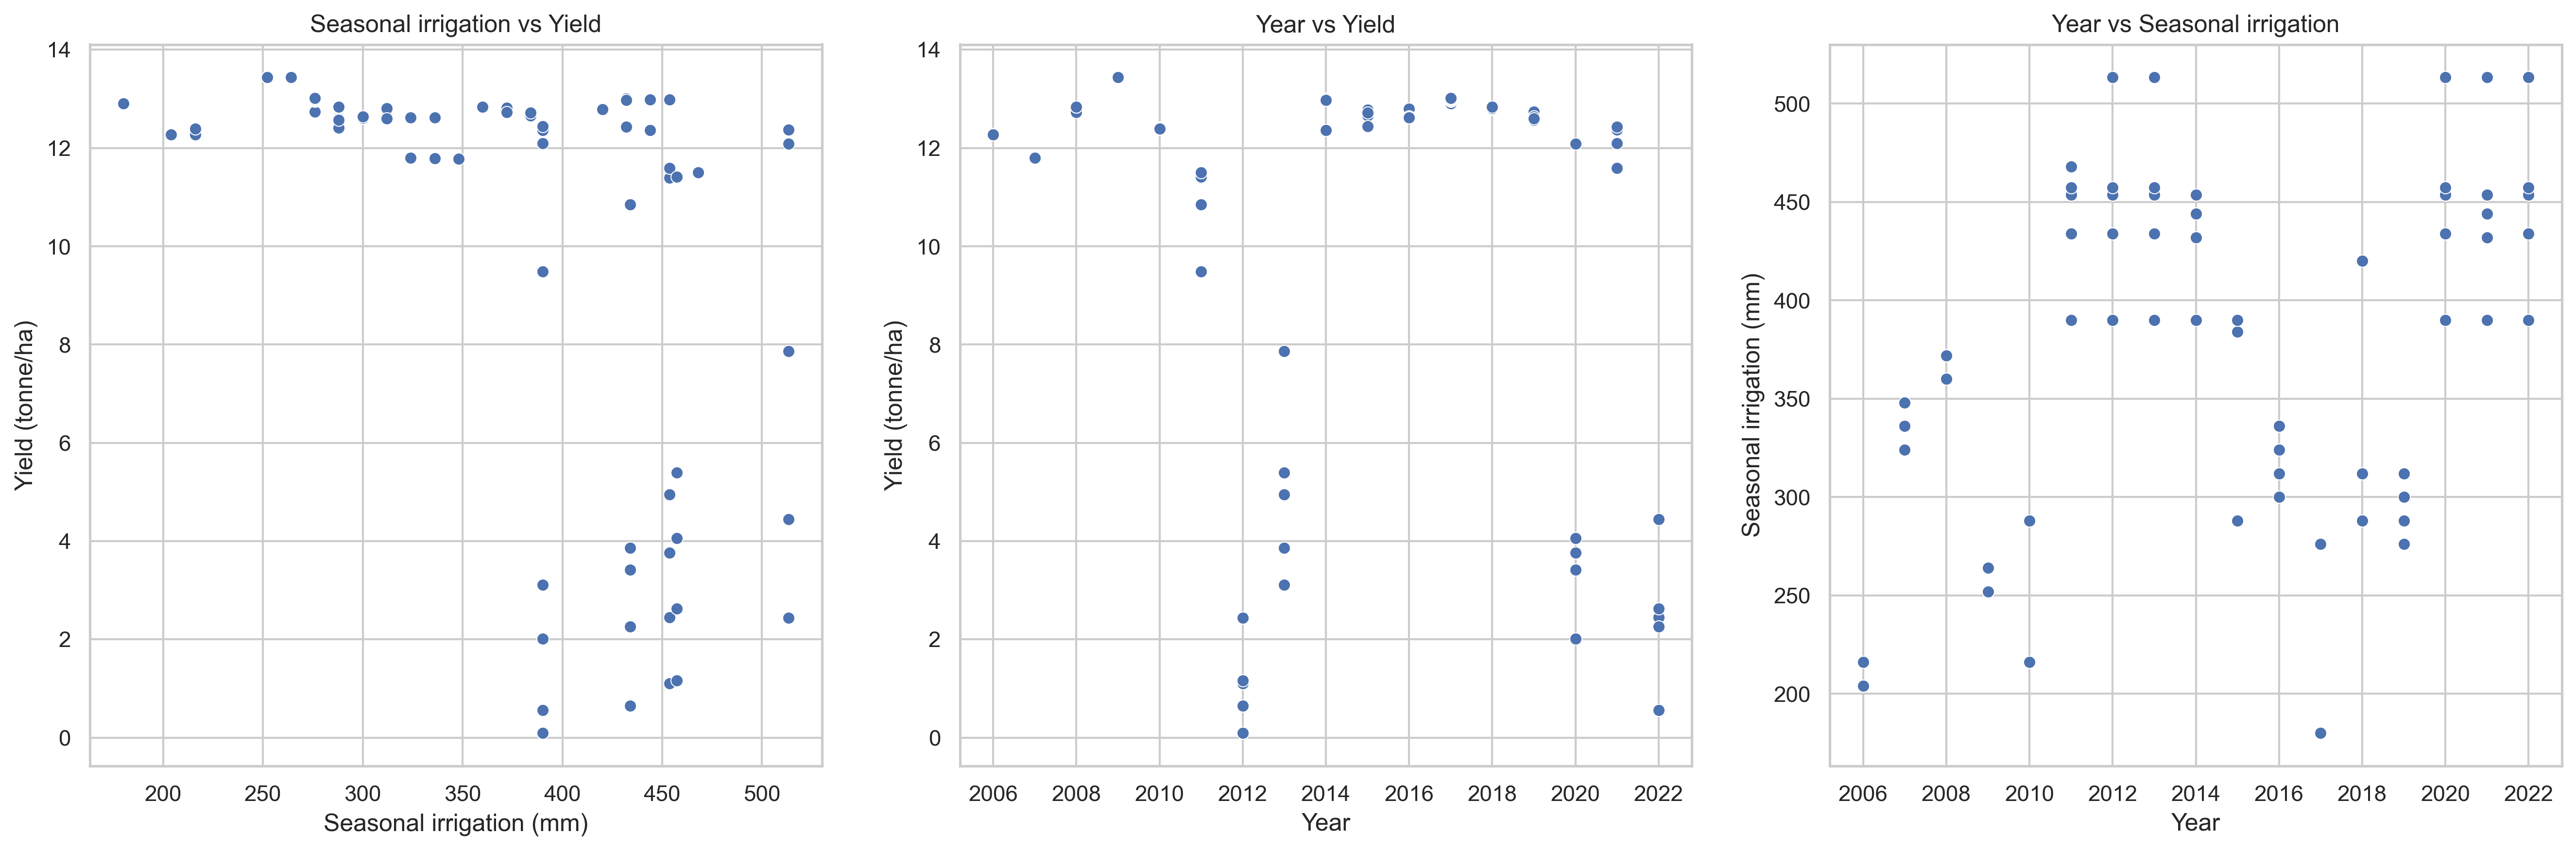

In [26]:
plt.rcParams["figure.dpi"] = 300
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Seasonal irrigation vs Yield
sns.scatterplot(x="Seasonal irrigation (mm)", y='Yield (tonne/ha)', data=all_yld_df, ax=axes[0])
axes[0].set_title('Seasonal irrigation vs Yield')

# Plot 2: Year vs Yield
sns.scatterplot(x='Year', y='Yield (tonne/ha)', data=all_yld_df, ax=axes[1])
axes[1].set_title('Year vs Yield')

# Plot 3: Year vs Seasonal irrigation
sns.scatterplot(x='Year', y='Seasonal irrigation (mm)', data=all_yld_df, ax=axes[2])
axes[2].set_title('Year vs Seasonal irrigation')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
simul_reported

NameError: name 'simul_reported' is not defined

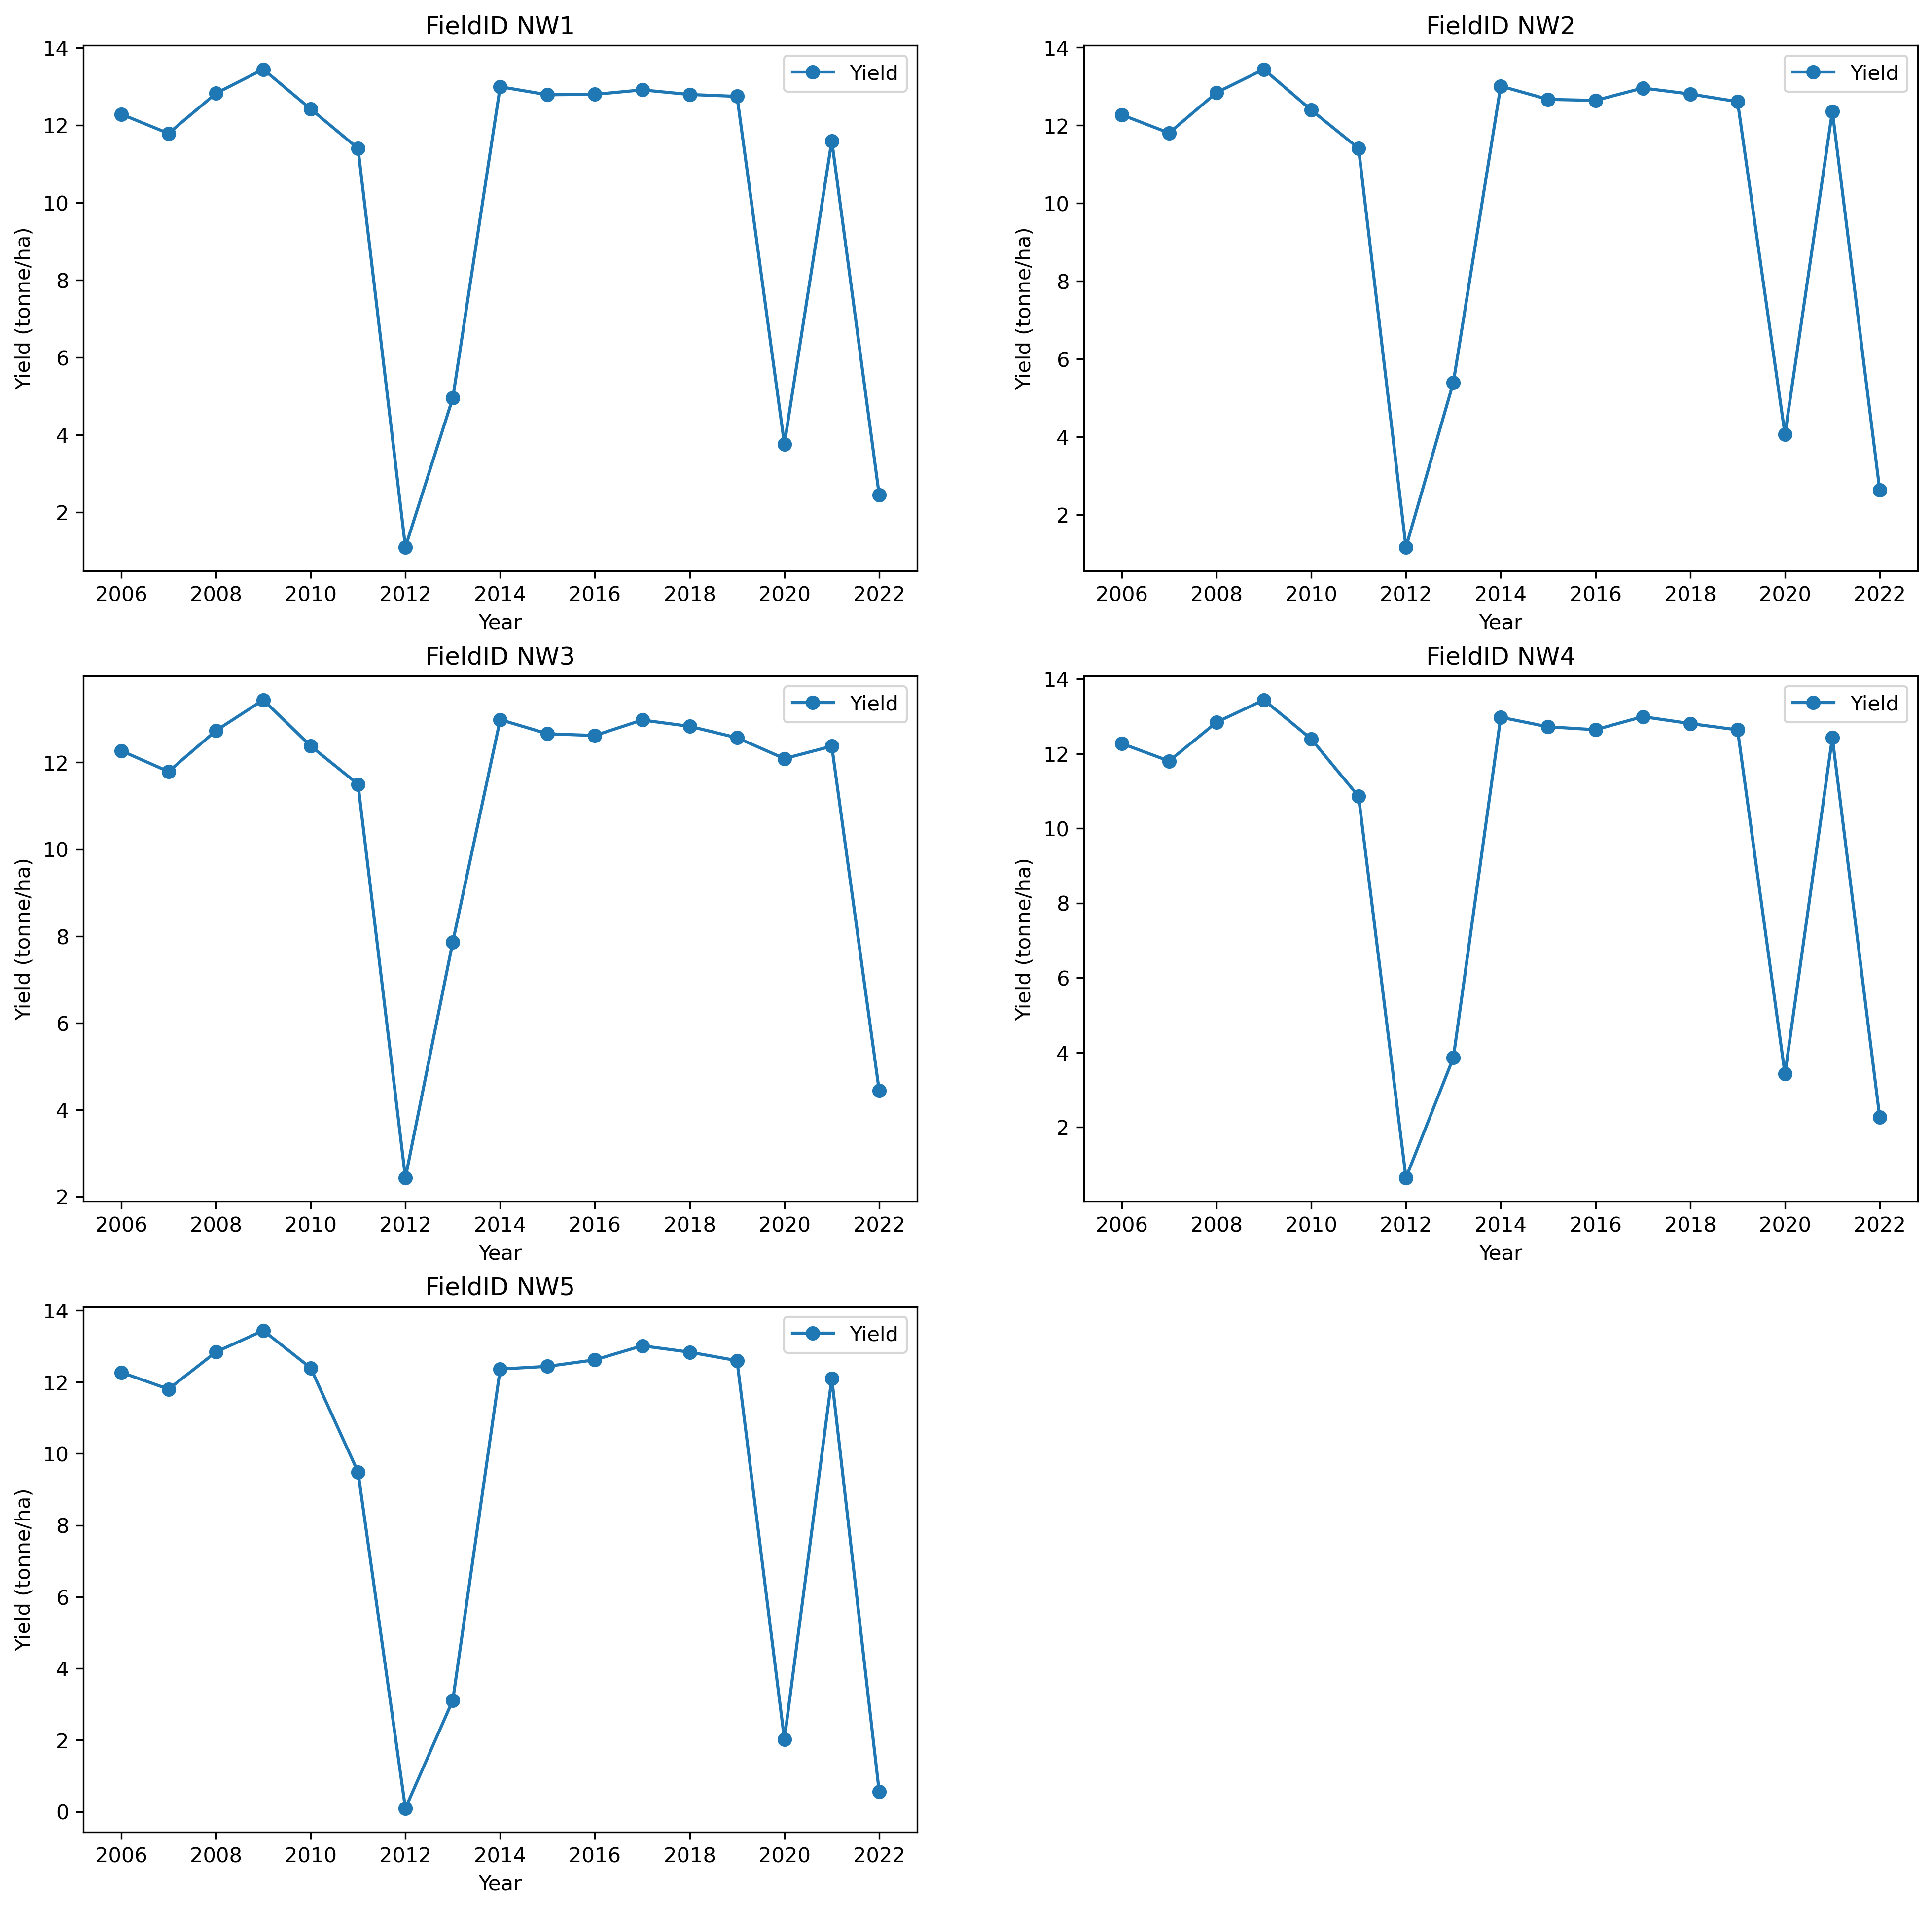

In [21]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_cols = 2
num_rows = 3

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
axes = axes.flatten()  # Flatten to easily iterate over axes

# Iterate over each FieldID group
for idx, (field_id, group) in enumerate(all_yld_df.groupby('FieldID')):
    if idx >= len(axes):  # If there are more FieldIDs than subplots
        break
    
    ax = axes[idx]
    ax.plot(group['Year'], group['Yield (tonne/ha)'], label='Yield', marker='o')
    # ax.plot(group['Year'], group['ensemble_et_mm'], label='ET_aqua', marker='o')
    ax.set_title(f'FieldID {field_id}')  # Add correlation if needed
    ax.set_xlabel('Year')
    ax.set_ylabel('Yield (tonne/ha)')
    ax.legend()

# Turn off any unused subplots
for idx in range(len(all_yld_df.groupby('FieldID')), len(axes)):
    axes[idx].axis('off')




In [31]:
gdd_df =pd.read_csv("Data/all_fields_GDD.csv")
gdd_df

Unnamed: 0  Emergence  Maturity FieldID
0           0        121      1815      SW
1           0        132      1804      WC
2           0        109      1723      NC
3           0        127      1699      NW